# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***CV_HSE_2021 HW1 <Фамилия Имя>***

soft deadline: 14.02.2021T23:59:00+0300

hard deadline: 21.02.2021T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

> Глаз переключается с фотопического зрения на скотопическое. Другими словами, у колбочек не хватает чувствительности, чтобы фиксировать слабый свет в тёмном помещении. А палочки в светлом помещении имели низкую чувствительность, чтобы человек не ослеп. И процесс повышения чуствительности палочек отнюдь не мгновенный и занимает до 30 минут. Поэтому и проходит некоторое время, прежде чем палочки повысят чувствительность и человек начнёт что-то видеть.

##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

> Давайте перепишем в матричном виде: $new = A \cdot old + b$
Давайте выразим $old$ через $new$: $old = A^{-1} \cdot (new - b)$ Таким образом, для устранения потери информации необходимо, чтобы матрица $A$ была обратима.

> Чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 линейное преобразование должно состоять из композиции поворотов, отражений и параллельных переносов, то есть линейное преобразование должно быть движением. Для этого достаточно ортогональности векторов матрицы $A$. $b$ может быть произвольным вектором.

## Практический блок

In [1]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

In [2]:
lena = cv2.imread("lena.png")

In [3]:
# По умолчанию загруженные картинки имеют формат BGR, так как пиксели в файле идет задом наперёд
# Поэтому давайте сделаем специальную функцию для отрисовки BGR картинок
def show_bgr(image):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

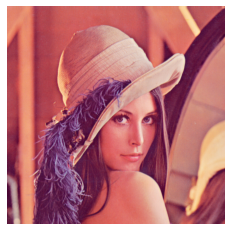

In [4]:
show_bgr(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

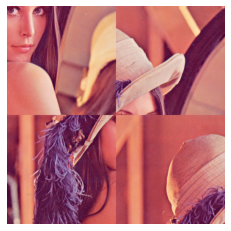

In [5]:
half_size = lena.shape[0] // 2
lena_swap = lena.copy()

lena_swap[:half_size, :half_size] = lena[half_size:, half_size:]
lena_swap[half_size:, half_size:] = lena[:half_size, :half_size]

show_bgr(lena_swap)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

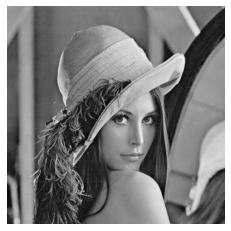

In [6]:
lena_gray_my = np.mean(lena, axis=-1, dtype=np.float32).astype(np.uint8)
plt.axis("off")
plt.imshow(lena_gray_my, cmap="gray")

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

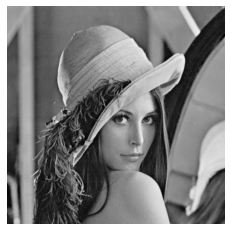

In [7]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(lena_gray_cvt, cmap="gray")

In [8]:
def get_diff(im1, im2):
    diff = np.abs(im1.astype(np.float32) - im2.astype(np.float32))
    mean_diff = diff.mean()
    max_diff = diff.max()
    print(f"Max diff: {max_diff}   |   mean diff: {mean_diff}")
    show_bgr(diff.astype(np.uint8))

Max diff: 39.0   |   mean diff: 5.660835266113281


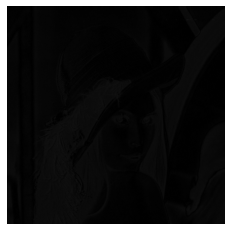

In [9]:
get_diff(lena_gray_cvt, lena_gray_my)

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

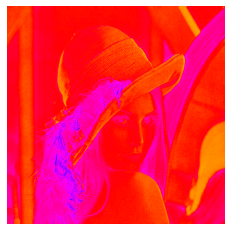

In [10]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_hsv[:, :, 1:] = 255
lena_hsv_bgr = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2BGR)
show_bgr(lena_hsv_bgr)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

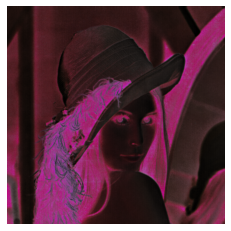

In [11]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_hsv[:, :, 2] = 255 - lena_hsv[:, :, 2]
lena_hsv_bgr = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2BGR)
show_bgr(lena_hsv_bgr)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

In [12]:
from itertools import permutations

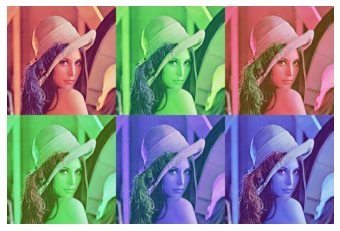

In [14]:
clr_perms = permutations([0, 1, 2], r=3)
lenas = []
for perm in clr_perms:
    lenas.append(lena[..., perm])

lenas = [[[lena] for lena in lenas[i:i+3]] for i in range(0, len(lenas), 3)]
lenas = np.block(lenas)
show_bgr(lenas)

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [15]:
lena_cie_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2Lab)

In [16]:
def bgr2lab(image_bgr):
    def gamma_normalize(img):
        img = img.astype(np.float32) / 255
        return np.where(img > 0.04045, ((img + 0.055) / 1.055)**2.4, img / 12.92)
    
    def func(t):
        return np.where(t > 0.008856, np.power(t, 1 / 3.0), 7.787 * t + 16 / 116.0)

    #Conversion Matrix
    matrix = np.array([[0.412453, 0.357580, 0.180423],
                       [0.212671, 0.715160, 0.072169],
                       [0.019334, 0.119193, 0.950227]])
    
    image_bgr = gamma_normalize(image_bgr)
    pixels_rgb = image_bgr[:, :, ::-1].reshape(-1, 3)
    xyz = matrix.dot(pixels_rgb.T).T.reshape(image_bgr.shape)

    xyz[:, :, 0] /= 0.950456
    xyz[:, :, 2] /= 1.088754

    # Calculate the L
    L = np.where(xyz[:, :, 1] > 0.008856, 116 * np.power(xyz[:, :, 1], 1 / 3.0) - 16.0, 903.3 * xyz[:, :, 1])

    # Calculate the a 
    a = 500 * (func(xyz[:, :, 0]) - func(xyz[:, :, 1]))

    # Calculate the b
    b = 200 * (func(xyz[:, :, 1]) - func(xyz[:, :, 2]))

    # OpenCV Format
    L *= 255 / 100
    a += 128
    b += 128
    
    return np.stack((L, a, b), axis=-1).astype(np.uint8)

In [17]:
lena_cie_my = bgr2lab(lena)

Max diff: 2.0   |   mean diff: 0.531378448009491


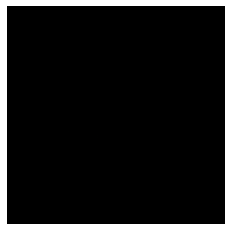

In [18]:
get_diff(lena_cie_cvt, lena_cie_my)

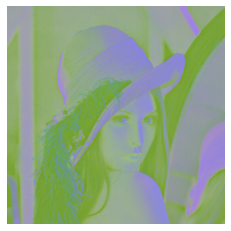

In [19]:
show_bgr(lena_cie_cvt)

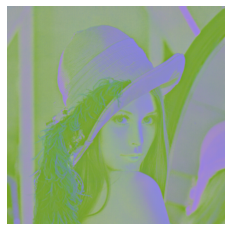

In [20]:
show_bgr(lena_cie_my)